In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Read in the data
data = pd.read_csv('C:/Users/Alex/Downloads/Transactions (1).csv') #TR.csv is the transactions file

# drop all columns ending with _ar
data = data.loc[:,~data.columns.str.endswith('_ar')]

# Try using errors='coerce' to handle OutOfBoundsDatetime error
data['instance_date'] = pd.to_datetime(data['instance_date'], format='%d-%m-%Y', errors='coerce')

# Remove NaT (Not a Time) rows that were coerced
data = data.dropna(subset=['instance_date'])

# Continue with your data processing
data = data[data['instance_date'] > '2009-01-01']
data = data.dropna(subset=['actual_worth'])


In [36]:
# save the data to a csv file
data.to_csv('C:/Users/Alex/Downloads/TR_clean.csv', index=False)

In [37]:
# Look at the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.info())

# print all different values of the column 'procedure_name_en'
print(data['procedure_name_en'].unique())

     transaction_id  procedure_id  trans_group_id trans_group_en  \
2   1-11-2010-15769            11               1          Sales   
3    1-110-2010-557           110               1          Sales   
5    1-11-2010-3056            11               1          Sales   
6  1-11-2009-214345            11               1          Sales   
7   1-110-2014-1257           110               1          Sales   

           procedure_name_en instance_date  property_type_id property_type_en  \
2                       Sell    2010-10-25                 3             Unit   
3  Lease to Own Registration    2010-03-24                 3             Unit   
5                       Sell    2010-03-10                 3             Unit   
6                       Sell    2009-07-20                 3             Unit   
7  Lease to Own Registration    2014-06-16                 3             Unit   

   property_sub_type_id property_sub_type_en  ... rooms_en  has_parking  \
2                  60.0      

In [38]:
data.head()

,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
2,1-11-2010-15769,11,1,Sales,Sell,2010-10-25,3,Unit,60.0,Flat,...,1 B/R,1,100.80,928756.0,9213.85,NaN,NaN,1.0,1.0,0.0
3,1-110-2010-557,110,1,Sales,Lease to Own Registration,2010-03-24,3,Unit,60.0,Flat,...,Studio,0,43.00,290000.0,6744.19,NaN,NaN,4.0,2.0,2.0
5,1-11-2010-3056,11,1,Sales,Sell,2010-03-10,3,Unit,60.0,Flat,...,Studio,1,47.65,519000.0,10891.92,NaN,NaN,1.0,2.0,0.0
6,1-11-2009-214345,11,1,Sales,Sell,2009-07-20,3,Unit,60.0,Flat,...,3 B/R,1,178.52,699000.0,3915.53,NaN,NaN,1.0,1.0,0.0
7,1-110-2014-1257,110,1,Sales,Lease to Own Registration,2014-06-16,3,Unit,60.0,Flat,...,1 B/R,1,77.81,1250000.0,16064.77,NaN,NaN,2.0,2.0,2.0


# Dubai's Property Market: A Journey Through Time

Dubai, a dynamic city renowned for its awe-inspiring architecture and luxurious lifestyle, has a vibrant property market. Let's embark on a journey through time, exploring the evolution of property worth in Dubai from 2009 to 2023.

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

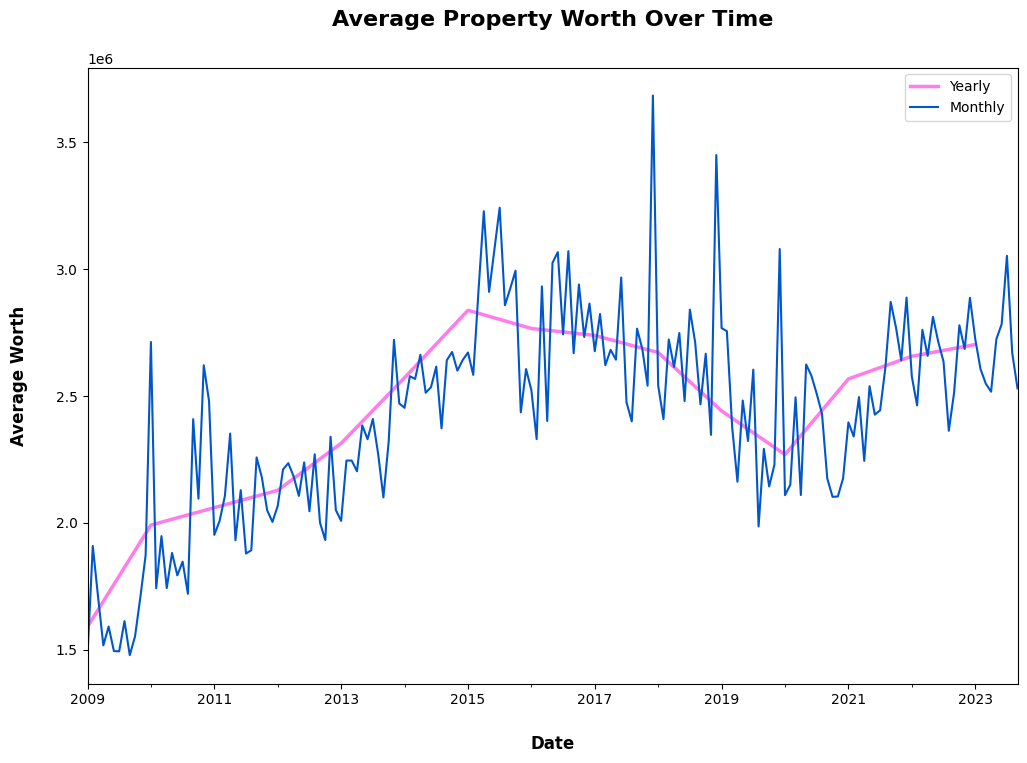

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Create a plot for monthly data
data.groupby(data['instance_date'].dt.to_period("M"))['actual_worth'].mean().plot(ax=ax, color='#0056cc', linewidth=1.5, label='Monthly')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Show the plot
plt.show()


## Observations:

1. **Phase of Growth (2009 - 2016)**: Starting our journey in 2009, the real estate landscape was beginning to regain its stability following the global financial crisis, with an average property worth of around AED 1.67 million. As we traverse through the years to 2016, we notice a steady upswing, with property worth peaking at around AED 2.81 million. The growth during this period can be attributed to several factors such as economic growth, increasing demand for properties, and rising prices.
    
2. **Phase of Contraction (2016 - 2020)**: As we move into the next phase, we notice a slight decline in property worth. From 2016 to 2020, the average property value dipped to AED 2.27 million. Various elements might have contributed to this dip, including market corrections, global economic slowdown, and other external influences.
    
3. **Phase of Recovery (2020 - 2023)**: Navigating towards the end of our journey, we find a remarkable resurgence in the property market. Post-2020, the average property worth started climbing again, hitting approximately AED 2.66 million in 2023. This resurgence could be a result of economic recovery, a renewed interest in the property market, and other favourable market conditions.

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

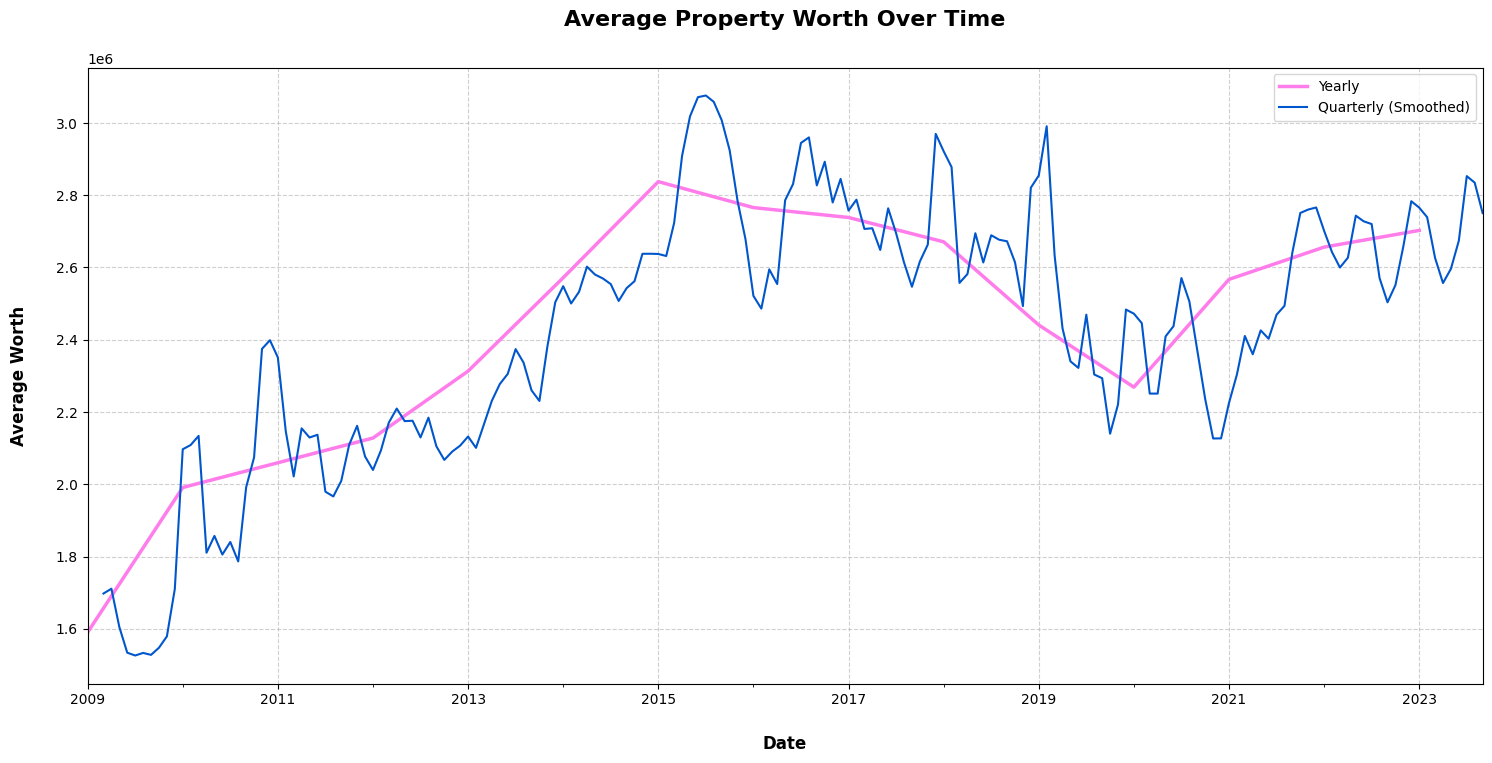

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Calculate monthly average property worth and 3-month (quarterly) rolling average
monthly_data = data.groupby(data['instance_date'].dt.to_period("M"))['actual_worth'].mean()
monthly_data_smooth = monthly_data.rolling(window=3).mean()

# Create a plot for smoothed monthly data
monthly_data_smooth.plot(ax=ax, color='#0056cc', linewidth=1.5, label='Quarterly (Smoothed)')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

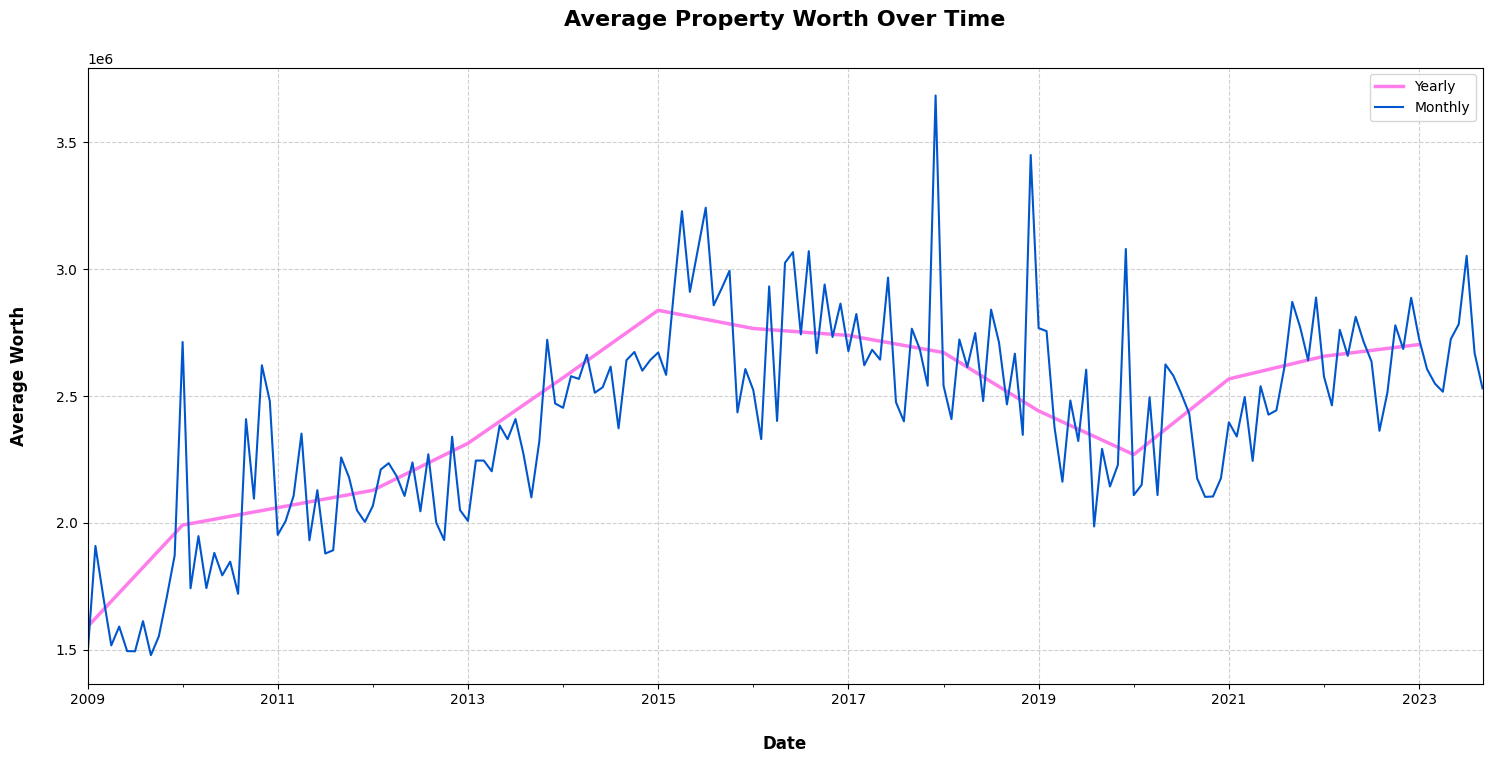

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Create a new column for the month and year
data['month_year'] = data['instance_date'].dt.to_period('M')

# Group by year and month, then compute mean property worth
monthly_data = data.groupby('month_year')['actual_worth'].mean()

# Create a plot for monthly data
monthly_data.plot(ax=ax, color='#0056cc', linewidth=1.5, label='Monthly')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [42]:
# Create a new column for the month
data['month'] = data['instance_date'].dt.month

# Group by month, then compute mean property worth
monthly_avg_data = data.groupby('month')['actual_worth'].mean()

# Find the month with maximum average property worth
peak_month = monthly_avg_data.idxmax()

print(f"The property value usually peaks in month: {peak_month}")


The property value usually peaks in month: 12


In [43]:
# Define the mapping of months to seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 
           11: 'Autumn', 12: 'Winter'}

# Add a new column for the season of each instance date
data['season'] = data['instance_date'].dt.month.map(seasons)

# Group by season and calculate the average actual worth
seasonal_worth = data.groupby('season')['actual_worth'].mean()

# Find the season with the highest average worth
highest_season = seasonal_worth.idxmax()

print(f"The highest average property worth typically occurs in: {highest_season}")


The highest average property worth typically occurs in: Winter


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

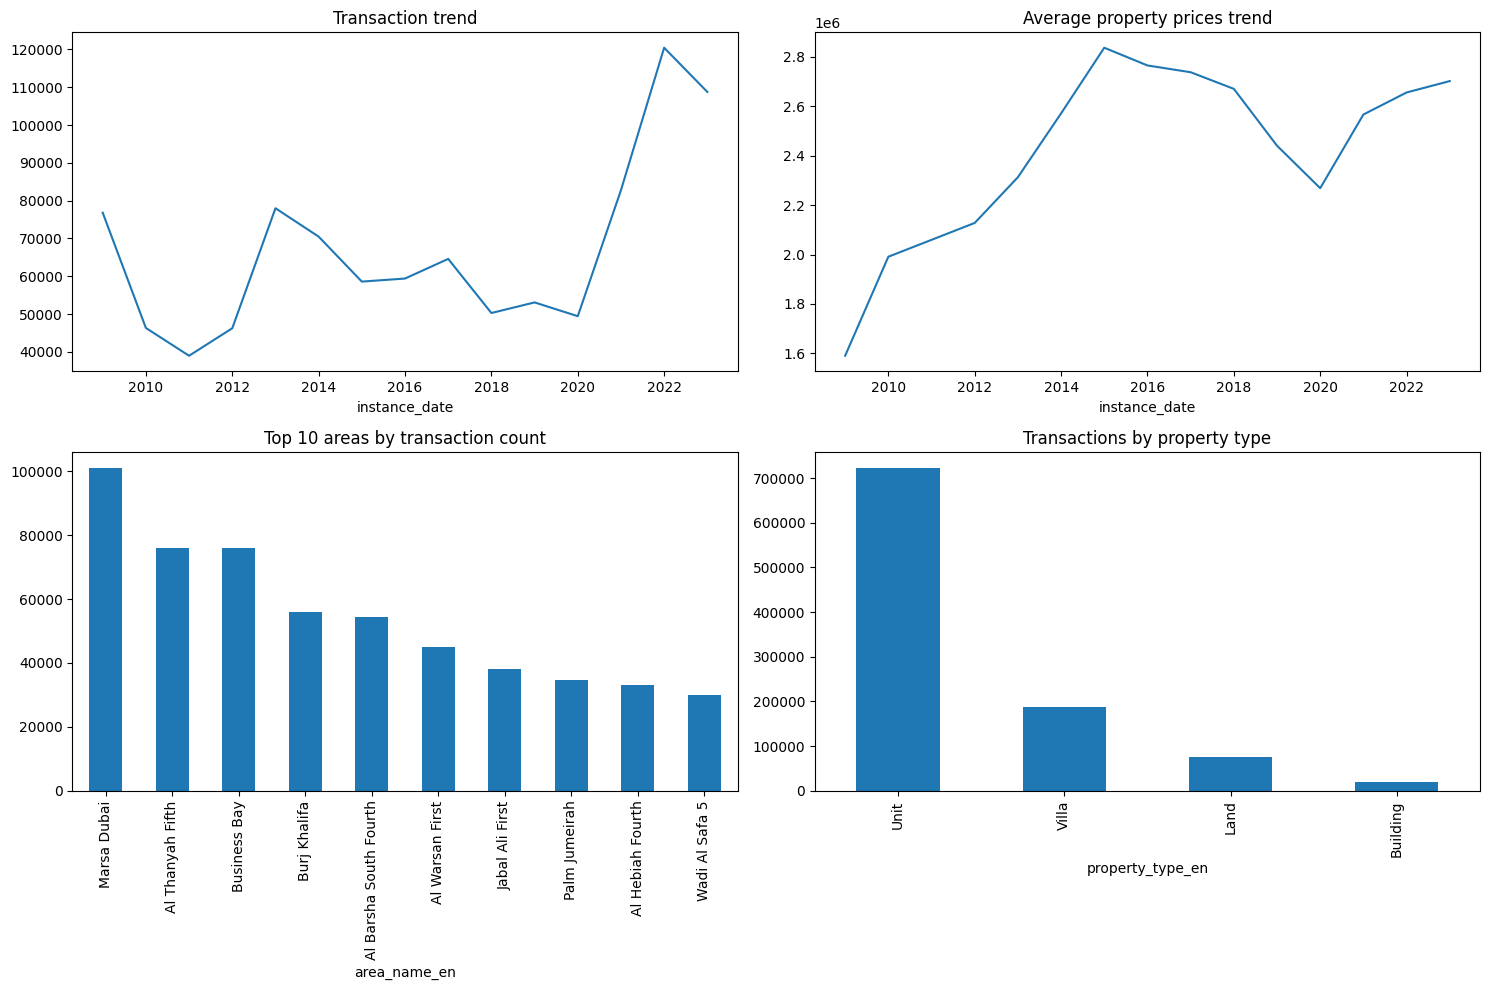

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

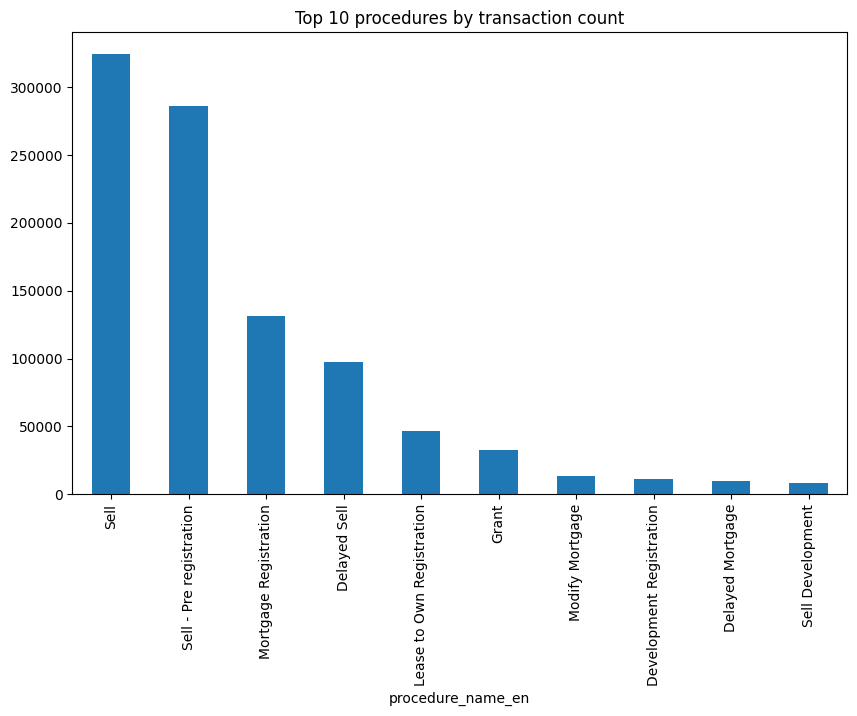

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

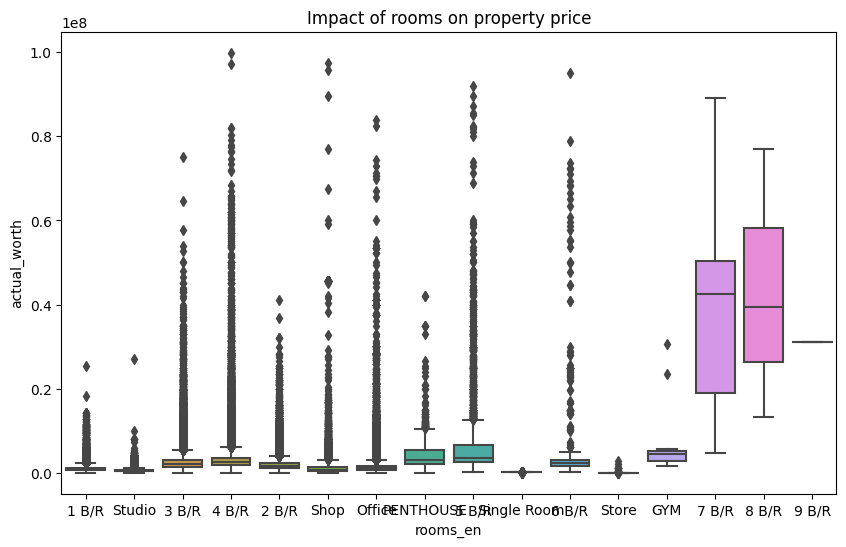

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Transaction trend
data.groupby(data['instance_date'].dt.year)['transaction_id'].count().plot(ax=axes[0, 0])
axes[0, 0].set_title('Transaction trend')

# Average property prices trend
data.groupby(data['instance_date'].dt.year)['actual_worth'].mean().plot(ax=axes[0, 1])
axes[0, 1].set_title('Average property prices trend')

# Transactions by area
data['area_name_en'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 areas by transaction count')

# Transactions by property type
data['property_type_en'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Transactions by property type')

# Show the plot
plt.tight_layout()
plt.show()

# Transactions by procedure
plt.figure(figsize=(10, 6))
data['procedure_name_en'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 procedures by transaction count')
plt.show()

# Impact of rooms on property price
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['rooms_en'], y=data['actual_worth'])
plt.title('Impact of rooms on property price')
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

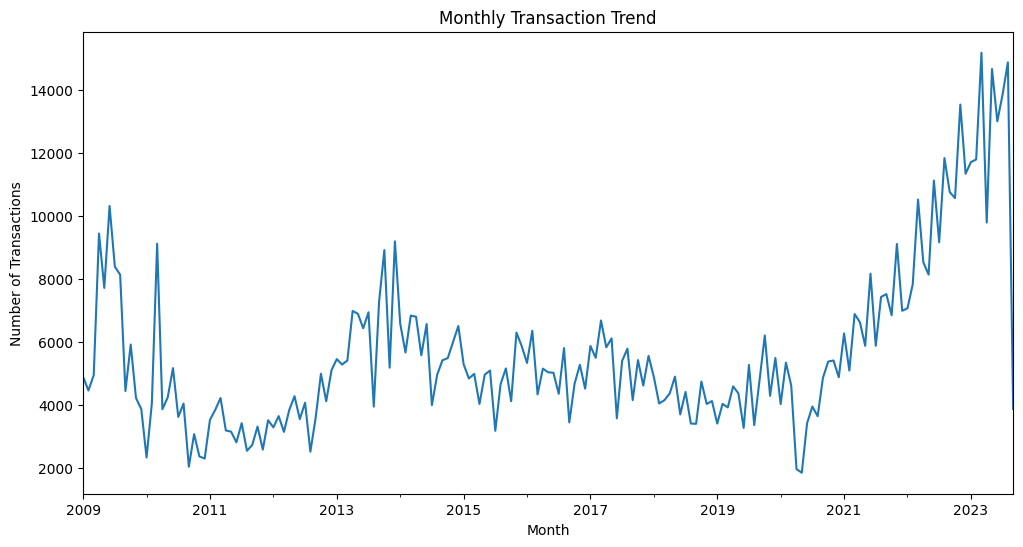

In [45]:
# Resample 'instance_date' to the month level and count the number of transactions
monthly_transactions = data.resample('M', on='instance_date')['transaction_id'].count()

# Plotting
plt.figure(figsize=(12, 6))
monthly_transactions.plot()
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

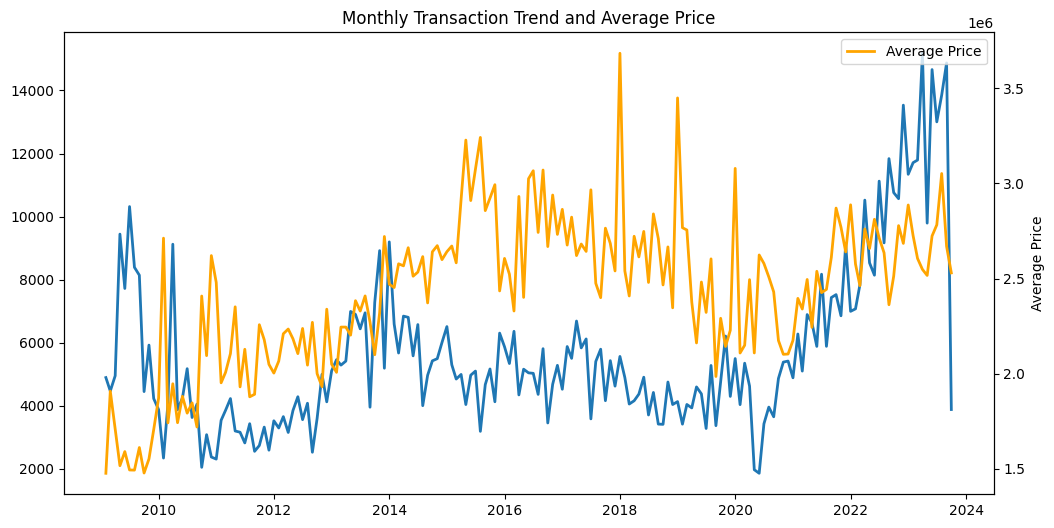

In [46]:
# Calculate the monthly average price
monthly_average_price = data.resample('M', on='instance_date')['actual_worth'].mean()

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the monthly transaction count
plt.plot(monthly_transactions.index, monthly_transactions, label='Number of Transactions', linewidth=2)

# Create a secondary y-axis
plt.twinx()

# Plot the monthly average price on the secondary y-axis
plt.plot(monthly_average_price.index, monthly_average_price, label='Average Price', color='orange', linewidth=2)

# Set the plot title and labels
plt.title('Monthly Transaction Trend and Average Price')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

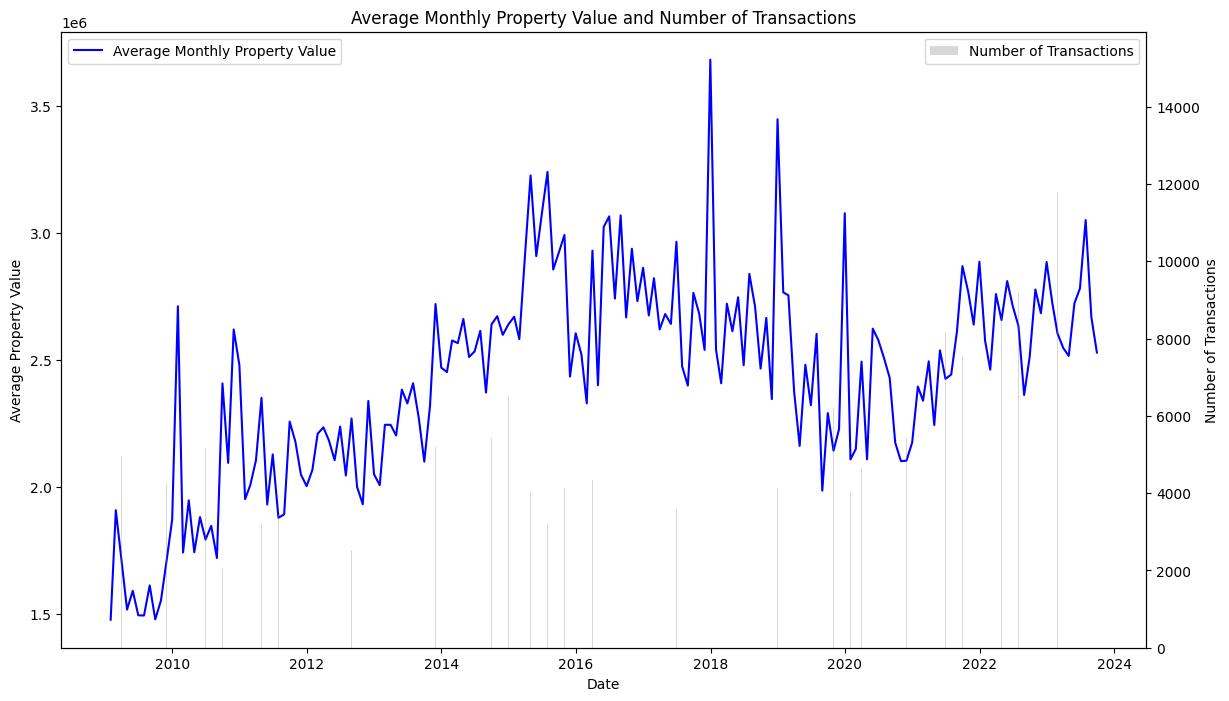

In [47]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))

# plot the average property value on the first (top) subplot
ax1.plot(monthly_average_price.index, monthly_average_price, color='blue', label='Average Monthly Property Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Property Value')
ax1.legend(loc='upper left')

# create a shared x-axis
ax2 = ax1.twinx()

# plot the number of transactions as a bar chart on the second (bottom) subplot
ax2.bar(monthly_transactions.index, monthly_transactions, color='gray', label='Number of Transactions', alpha=0.3)
ax2.set_ylabel('Number of Transactions')
ax2.legend(loc='upper right')

plt.title('Average Monthly Property Value and Number of Transactions')
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

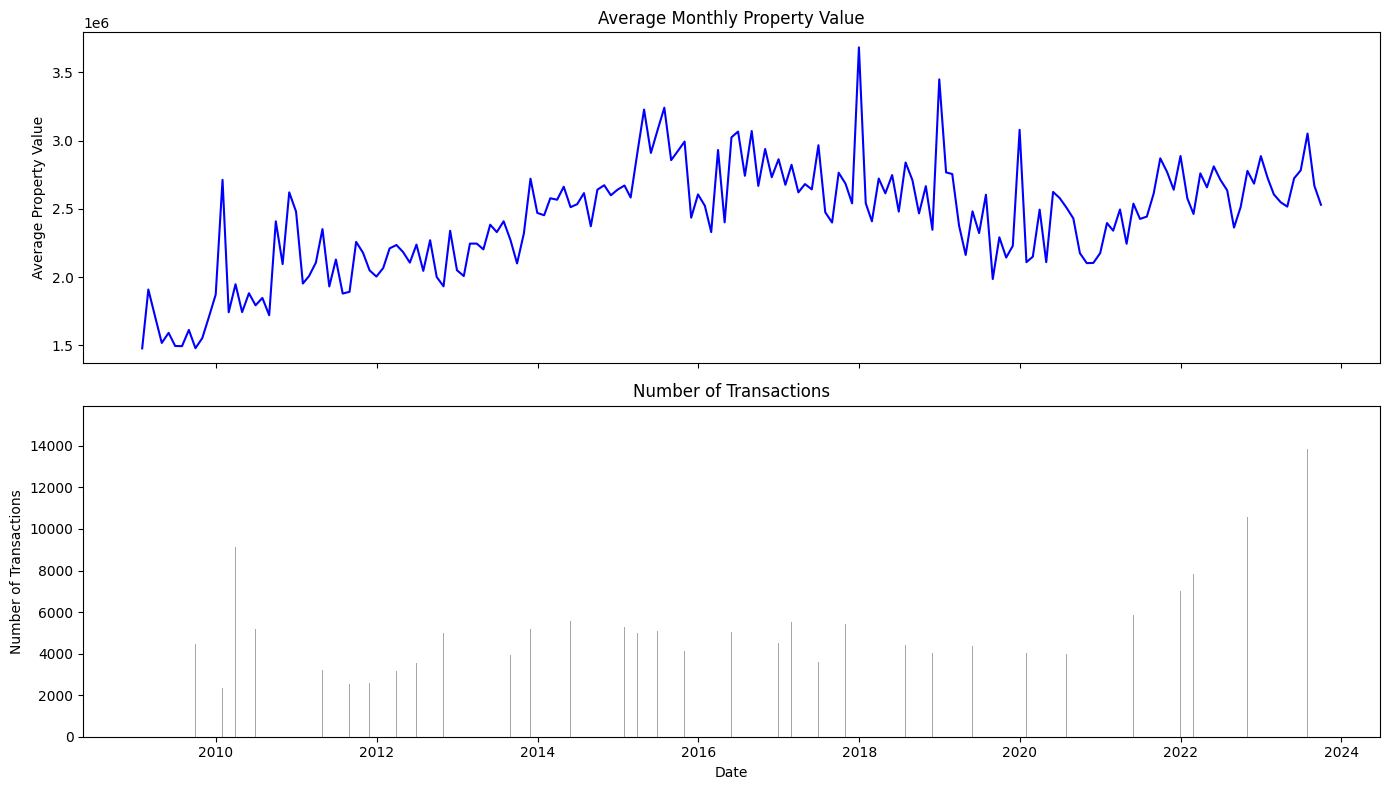

In [48]:
import matplotlib.pyplot as plt

# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot the average property value on the first (top) subplot
ax1.plot(monthly_average_price.index, monthly_average_price, color='blue')
ax1.set_ylabel('Average Property Value')
ax1.title.set_text('Average Monthly Property Value')

# Plot the number of transactions as a bar chart on the second (bottom) subplot
ax2.bar(monthly_transactions.index, monthly_transactions, color='gray', alpha=0.7)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Transactions')
ax2.title.set_text('Number of Transactions')

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Show plot
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

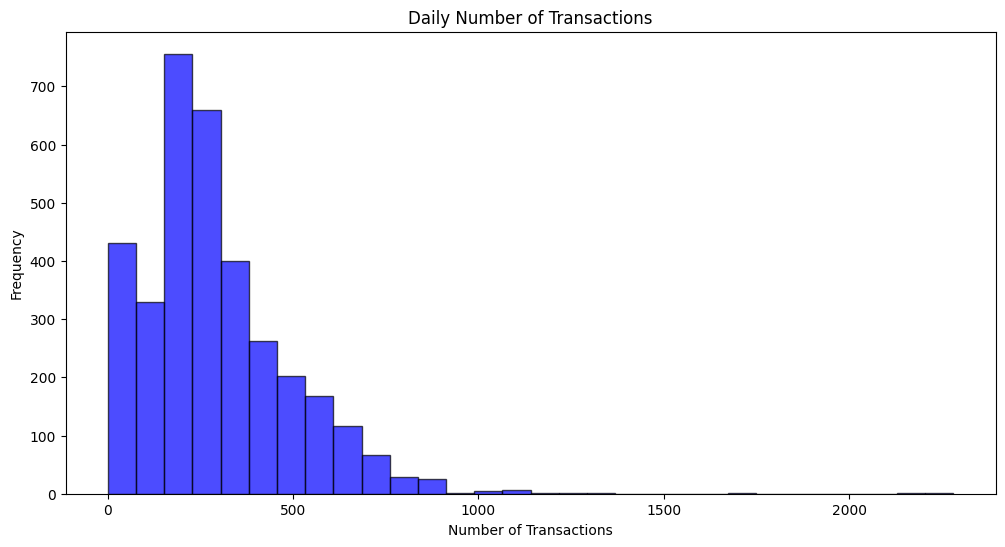

In [49]:
# Group by date and count the number of transactions
daily_transactions = data.groupby(data['instance_date'].dt.date).size()

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(daily_transactions, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Daily Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

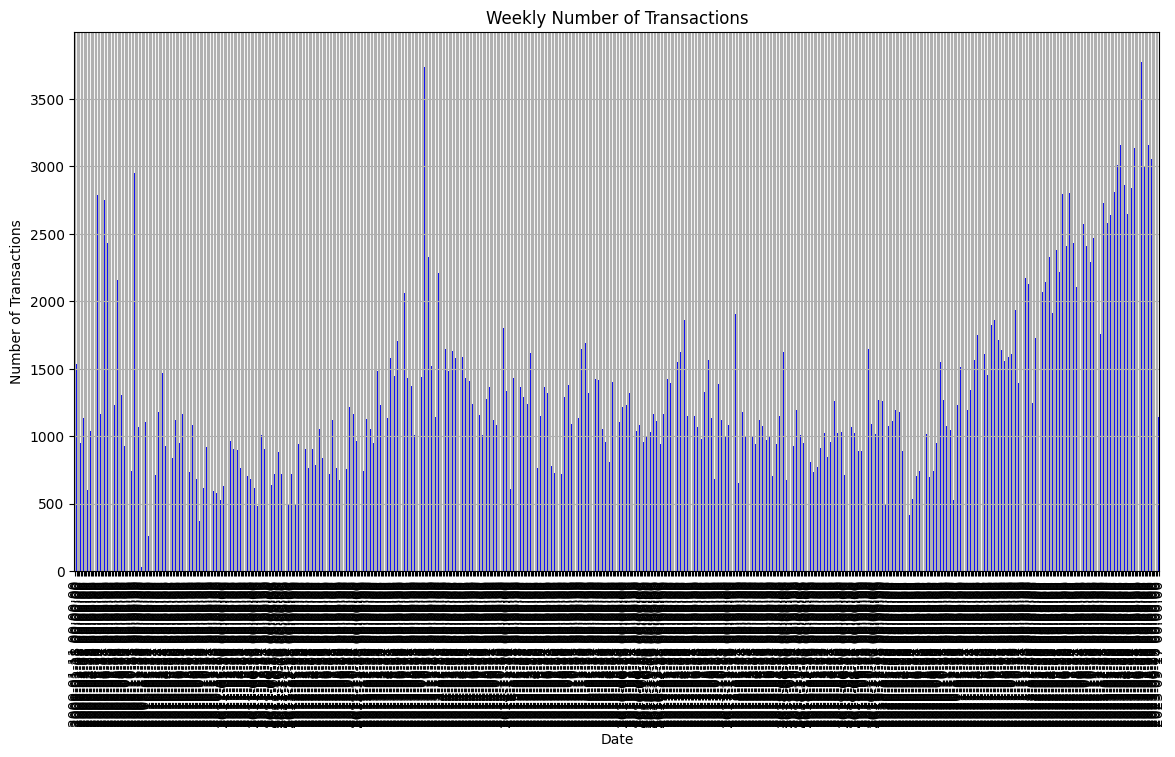

In [50]:
# Group by week and count the number of transactions
weekly_transactions = data.resample('W', on='instance_date').size()

# Plot the weekly transactions
plt.figure(figsize=(14, 7))
weekly_transactions.plot(kind='bar', color='blue')
plt.title('Weekly Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()



findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

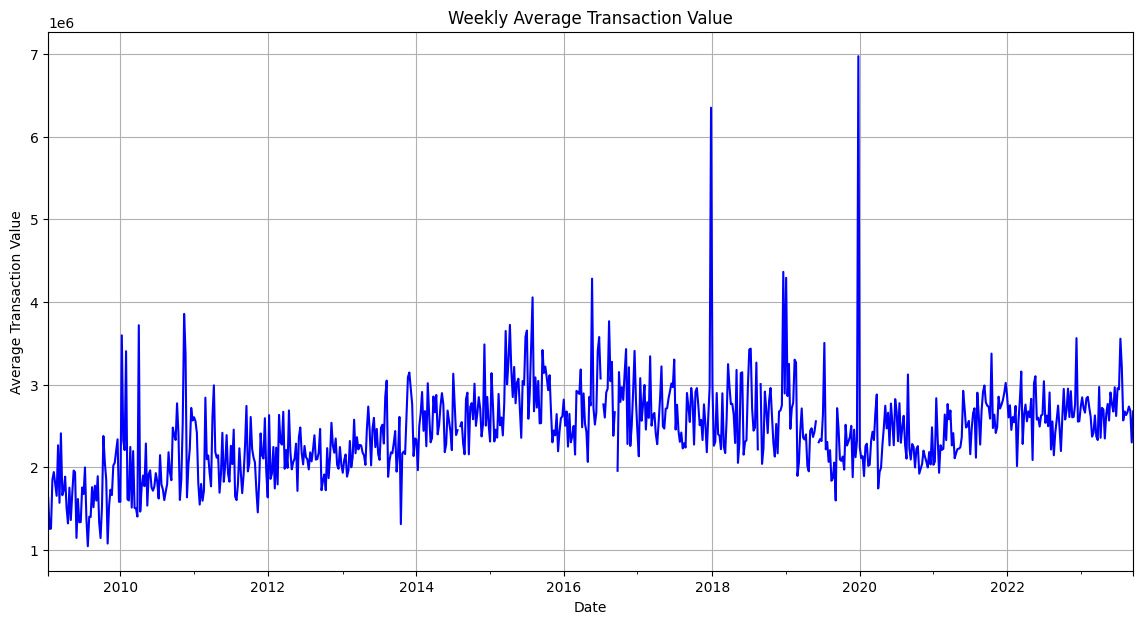

In [51]:
# Group by week and calculate the average transaction value
weekly_average_value = data.resample('W', on='instance_date')['actual_worth'].mean()

# Plot the weekly average transaction value
plt.figure(figsize=(14, 7))
weekly_average_value.plot(kind='line', color='blue')
plt.title('Weekly Average Transaction Value')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.grid()
plt.show()



findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

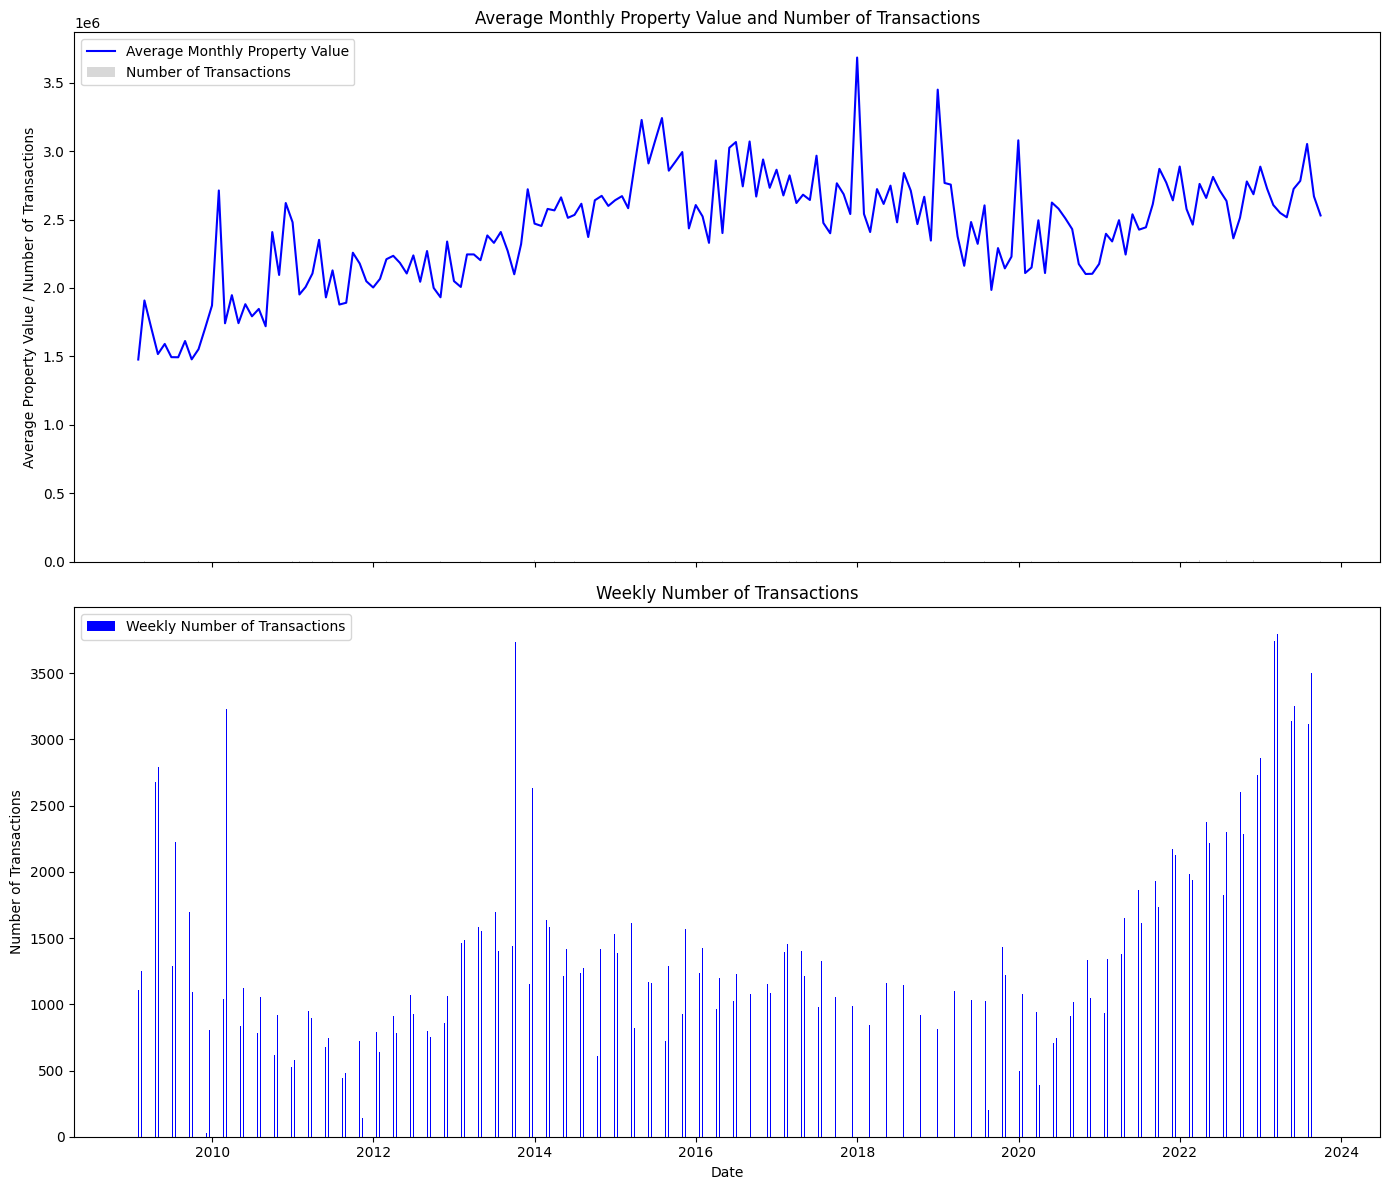

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot the average monthly property value and number of transactions on the first (top) subplot
ax1.plot(monthly_average_price.index, monthly_average_price, color='blue', label='Average Monthly Property Value')
ax1.bar(monthly_transactions.index, monthly_transactions, color='gray', label='Number of Transactions', alpha=0.3)
ax1.set_ylabel('Average Property Value / Number of Transactions')
ax1.legend(loc='upper left')
ax1.set_title('Average Monthly Property Value and Number of Transactions')

# Plot the weekly number of transactions on the second (bottom) subplot
ax2.bar(weekly_transactions.index, weekly_transactions, color='blue', label='Weekly Number of Transactions')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Transactions')
ax2.legend(loc='upper left')
ax2.set_title('Weekly Number of Transactions')

plt.tight_layout()
plt.show()


TypeError: can only concatenate list (not "PolyCollection") to list

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

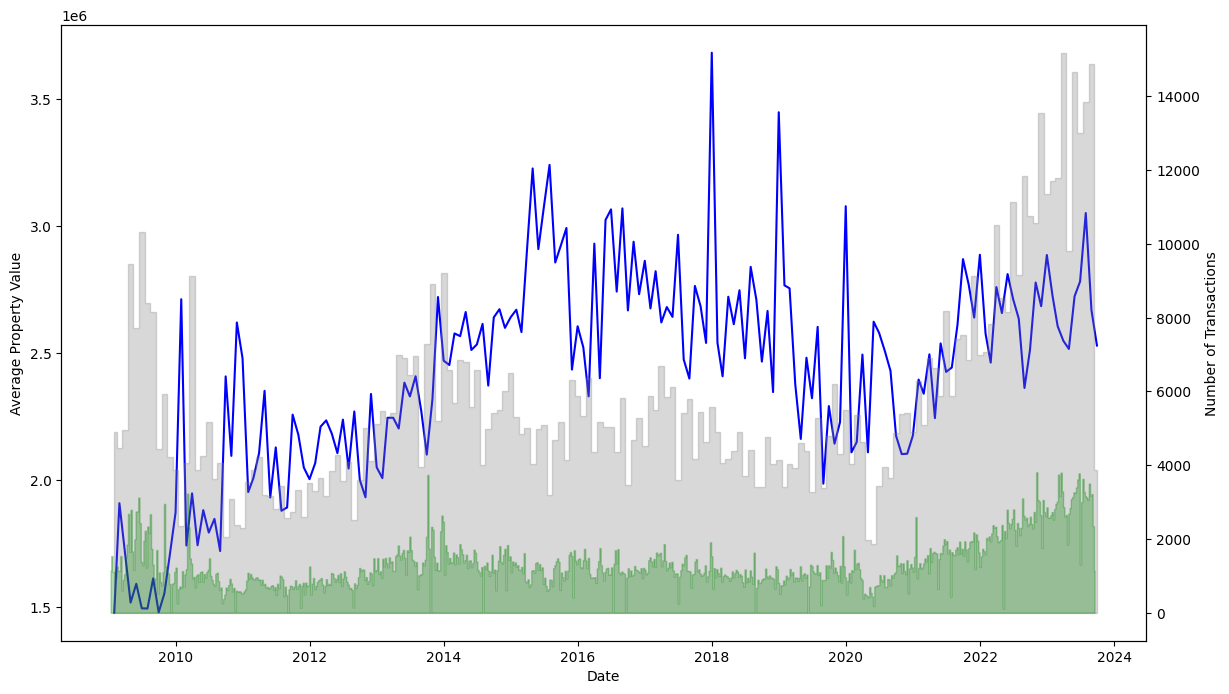

In [53]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# plot the average property value
lns1 = ax1.plot(monthly_average_price.index, monthly_average_price, color='blue', label='Average Monthly Property Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Property Value')

# plot the number of transactions as a bar chart
ax2 = ax1.twinx()
lns2 = ax2.fill_between(monthly_transactions.index, monthly_transactions, color='gray', label='Number of Monthly Transactions', alpha=0.3, step='mid')
ax2.set_ylabel('Number of Transactions')

# plot the weekly transactions
lns3 = ax2.fill_between(weekly_transactions.index, weekly_transactions, color='green', label='Number of Weekly Transactions', alpha=0.3, step='mid')

# to put all legends in one box
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Average Monthly Property Value and Number of Transactions')
plt.show()


In [56]:
data10k = data.sample(n=10000, random_state=1)
data10k.to_csv('C:/Users/Alex/Downloads/TR_10k.csv', index=False)

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

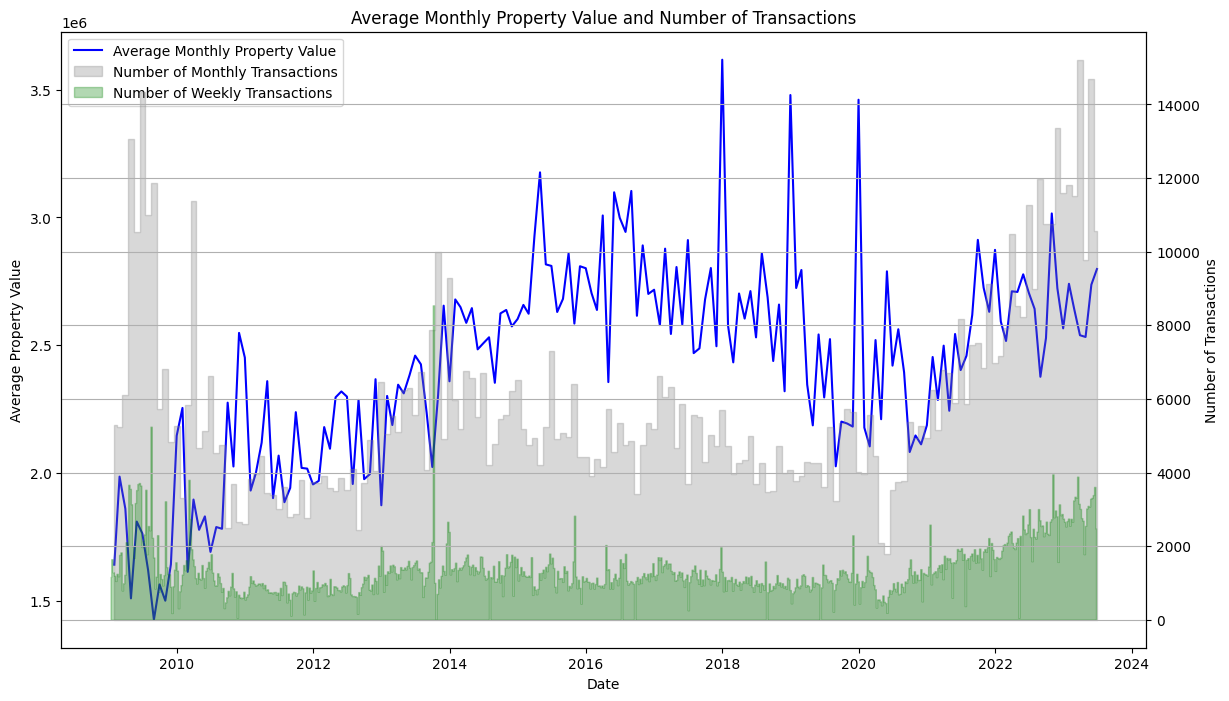

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# plot the average property value
lns1 = ax1.plot(monthly_average_price.index, monthly_average_price, color='blue', label='Average Monthly Property Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Property Value')

# plot the number of transactions as a bar chart
ax2 = ax1.twinx()
lns2 = ax2.fill_between(monthly_transactions.index, monthly_transactions, color='gray', label='Number of Monthly Transactions', alpha=0.3, step='mid')
ax2.set_ylabel('Number of Transactions')

# plot the weekly transactions
lns3 = ax2.fill_between(weekly_transactions.index, weekly_transactions, color='green', label='Number of Weekly Transactions', alpha=0.3, step='mid')

# To put all legends in one box, we have to create a list of line objects manually
lns = lns1 + [lns2] + [lns3]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Average Monthly Property Value and Number of Transactions')
plt.grid(True)
plt.show()


### Pipeline for this graph

In [ ]:

# Import necessary libraries
import pandas as pd

# Assume "data" DataFrame is loaded here. You'll need to replace this with actual code to load your data.
# data = pd.read_csv("your_data.csv")

# Calculate the monthly average price
monthly_average_price = data.resample('M', on='instance_date')['actual_worth'].mean()

# Resample 'instance_date' to the month level and count the number of transactions
monthly_transactions = data.resample('M', on='instance_date')['transaction_id'].count()

# Group by week and count the number of transactions
weekly_transactions = data.resample('W', on='instance_date').size()

# Save the data to a CSV file
result = pd.concat([monthly_average_price, monthly_transactions, weekly_transactions], axis=1)
result.columns = ['monthly_average_price', 'monthly_transactions', 'weekly_transactions']
result.to_csv("visualization_data.csv", index=True)


In [29]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
# You'll replace this with your actual data
data_dict = {
    'instance_date': pd.date_range(start='2021-01-01', end='2022-12-31', freq='D'),
    'actual_worth': [100 + i for i in range(730)],
    'transaction_id': range(1, 731)
}
data = pd.DataFrame(data_dict)

# Calculate the quarterly average property value and transaction counts for the current and previous years
def calculate_quarterly_performance(data):
    # Resample data by quarter
    data['instance_date'] = pd.to_datetime(data['instance_date'])
    data_quarterly = data.resample('Q', on='instance_date').agg({'actual_worth': 'mean', 'transaction_id': 'count'}).reset_index()
    
    # Extract year and quarter
    data_quarterly['Year'] = data_quarterly['instance_date'].dt.year
    data_quarterly['Quarter'] = data_quarterly['instance_date'].dt.to_period("Q")
    
    # Filter data for the last two years
    last_two_years = data_quarterly['Year'].unique()[-2:]
    data_filtered = data_quarterly[data_quarterly['Year'].isin(last_two_years)].copy()
    
    return data_filtered

# Calculate quarterly performance data
quarterly_data = calculate_quarterly_performance(data)

# Let's see what the quarterly data looks like
quarterly_data.head()


,instance_date,actual_worth,transaction_id,Year,Quarter
0,2021-03-31,144.5,90,2021,2021Q1
1,2021-06-30,235.0,91,2021,2021Q2
2,2021-09-30,326.5,92,2021,2021Q3
3,2021-12-31,418.5,92,2021,2021Q4
4,2022-03-31,509.5,90,2022,2022Q1


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

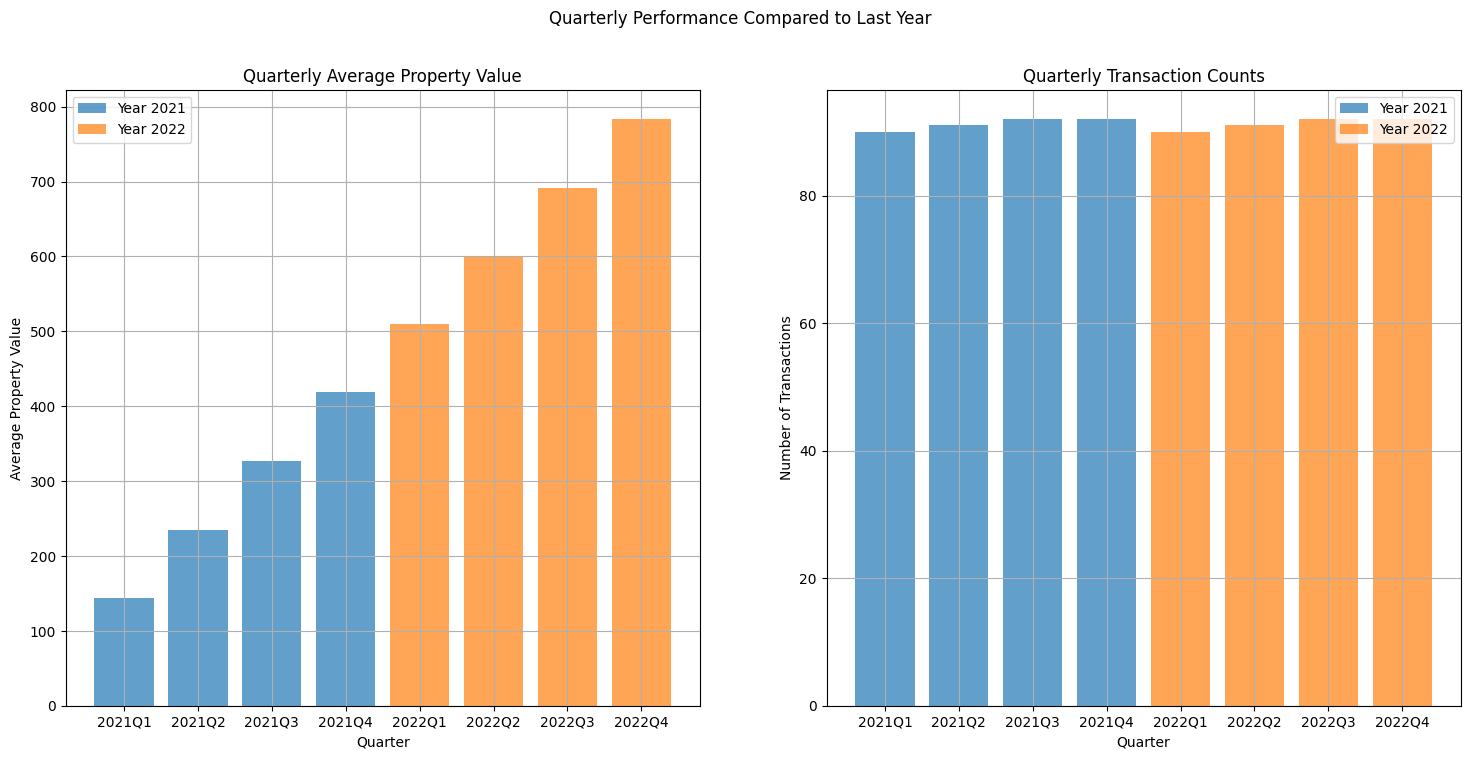

In [33]:
# Create the dashboard for comparing Q1, Q2, Q3, Q4 performance between the last two years
def create_dashboard(quarterly_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot average property values
    for year in quarterly_data['Year'].unique():
        ax1.bar(quarterly_data[quarterly_data['Year'] == year]['Quarter'].astype(str),
                quarterly_data[quarterly_data['Year'] == year]['actual_worth'],
                alpha=0.7,
                label=f'Year {year}')
    ax1.set_title('Quarterly Average Property Value')
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Average Property Value')
    ax1.legend()
    ax1.grid(True)

    # Plot transaction counts
    for year in quarterly_data['Year'].unique():
        ax2.bar(quarterly_data[quarterly_data['Year'] == year]['Quarter'].astype(str),
                quarterly_data[quarterly_data['Year'] == year]['transaction_id'],
                alpha=0.7,
                label=f'Year {year}')
    ax2.set_title('Quarterly Transaction Counts')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Number of Transactions')
    ax2.legend()
    ax2.grid(True)

    plt.suptitle('Quarterly Performance Compared to Last Year')
    plt.show()

# Create the dashboard
create_dashboard(quarterly_data)


In [32]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Filter the data to include only records from 2009 up to and including the current year
data = data[data['instance_date'].dt.year <= current_year]

# Drop all columns ending with _ar
data = data.loc[:, ~data.columns.str.endswith('_ar')]

# Convert instance_date to datetime and handle errors
data['instance_date'] = pd.to_datetime(data['instance_date'], format='%d-%m-%Y', errors='coerce')

# Remove NaT (Not a Time) rows that were coerced
data = data.dropna(subset=['instance_date'])

# Get the current year
current_year = datetime.now().year

# Filter the data to include only records from 2009 up to and including the current year
data = data[(data['instance_date'].dt.year >= 2009) & (data['instance_date'].dt.year <= current_year)]

# Remove rows with missing values in the actual_worth column
data = data.dropna(subset=['actual_worth'])


In [57]:
data.shape

(1004083, 35)